In [1]:
import networkx as nx
from pyvis.network import Network
import numpy as np
import uuid
from ipysigma import Sigma
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl

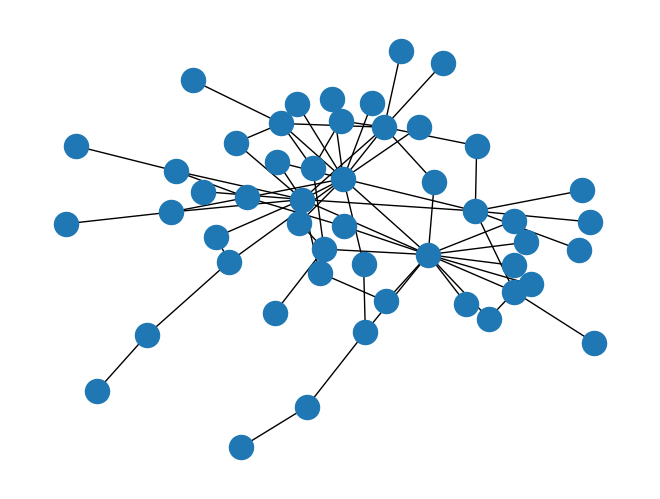

In [2]:
def get_new_test_graph():
    NUM_NODES = 50
    p = 0.5
    seed = 1
    test_graph = nx.dual_barabasi_albert_graph(n=NUM_NODES, p=p, seed=1, m1=2, m2=1)

    # append node properties
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
        data['node_identifier'] = str(uuid.uuid4())
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

    # append edge properties
    for u, v, data in test_graph.edges(data=True):
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
    
        
    return test_graph

test_graph = get_new_test_graph()
nx.draw(test_graph)

Features to consider:
- Degree
- Betweenness Centrality
- Feature 1
- Feature 2
- Feature 3

# pyvis

Set betweenness centrality as node size. 
Display node identifier for nodes.
Use title to display feature values.

In [3]:
class MplColorHelper:

    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

    def get_rgba(self, val):
        return self.scalarMap.to_rgba(val, bytes=True)

    def get_rgb_str(self, val):
        r, g, b, a = self.get_rgba(val)
        return f"rgb({r},{g},{b})"

In [4]:
# modify network to conform to pyvis specs
test_graph = get_new_test_graph()

# prep node color generator
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
node_colors = MplColorHelper("Reds", betweenness_min, betweenness_max)

# prep edge color generator
vals = nx.get_edge_attributes(test_graph, 'feature1').values()
val_min, val_max = min(vals), max(vals)
edge_colors = MplColorHelper("Reds", val_min, val_max)

for node, data in test_graph.nodes(data=True):
    data['value'] = data['betweenness_centrality'] # node size
    data['label'] = data['node_identifier'] 
    data['title'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']}" + 
        f"\nfeature 2: {data['feature2']}" + 
        f"\nfeature 3: {data['feature3']}" + 
        f"\nBetweenness Centrality: {data['betweenness_centrality']}" + 
        f"\nDegree: {data['degree']}"
    ) 
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])
    
for u, v, data in test_graph.edges(data=True):
    data['value'] = data['feature1']
    data['color'] = edge_colors.get_rgb_str(data['feature1'])
    data['title'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" + 
        f"\nfeature 1: {data['feature1']}" + 
        f"\nfeature 2: {data['feature2']}"
    )

In [5]:
net = Network(height=900, width="100%", bgcolor="grey", filter_menu=True)
net.show_buttons()
net.from_nx(test_graph)
net.save_graph('pyvis_homogenous_undirected_example.html')

# ipysigma

In [6]:
test_graph = get_new_test_graph()

In [ ]:
Sigma(
    test_graph,

    # node config
    node_color='betweenness_centrality',
    node_color_gradient="Reds",
    node_size='betweenness_centrality',
    node_label='node_identifier',

    # edge config
    edge_color="feature1",
    edge_color_gradient="Reds", 
    edge_size="feature1",

    # graph config
    height=900,
    background_color="grey"

)

# Directed, Homogenous Network

In [93]:
def get_new_test_digraph():
    NUM_NODES = 50
    test_graph = nx.scale_free_graph(n=NUM_NODES, seed=0)

    # append node properties
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
         
        data['node_type'] = 0 if node < 25 else 1

        data['node_identifier'] = str(uuid.uuid4())
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

    # append edge properties
    for u, v, data in test_graph.edges(data=True):
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        
    return test_graph

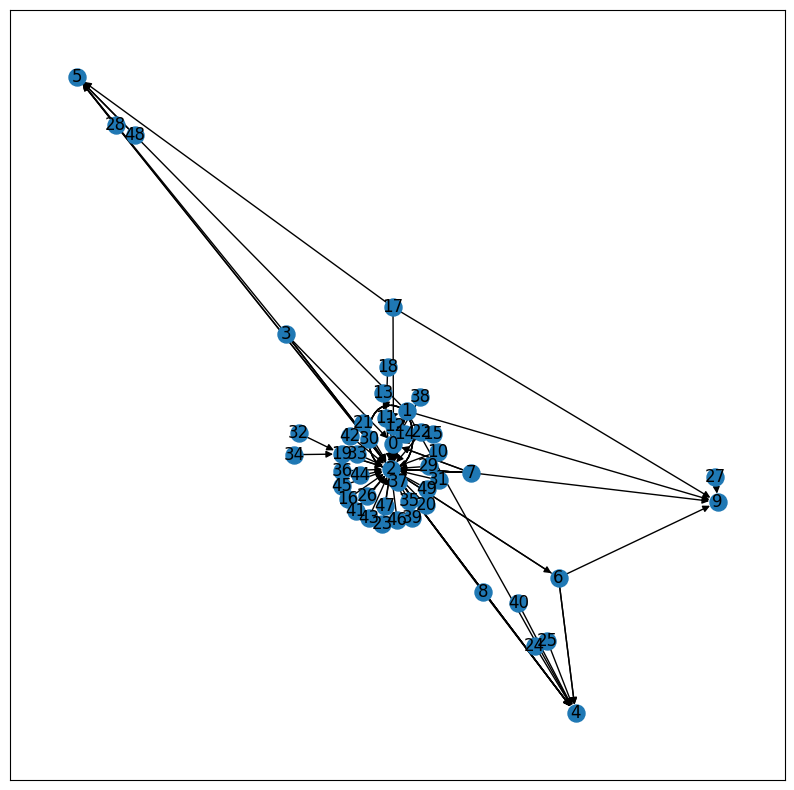

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
test_graph = get_new_test_digraph()
nx.draw_networkx(test_graph, node_size=150)

# Pyvis

In [95]:
# prep node color generator
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
node_colors = MplColorHelper("Reds", betweenness_min, betweenness_max)

for node, data in test_graph.nodes(data=True):
    data['value'] = data['betweenness_centrality'] # node size
    data['label'] = data['node_identifier'] 
    data['title'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']}" + 
        f"\nfeature 2: {data['feature2']}" + 
        f"\nfeature 3: {data['feature3']}" + 
        f"\nBetweenness Centrality: {data['betweenness_centrality']}" + 
        f"\nDegree: {data['degree']}"
    ) 
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])
    data['shape'] = 'dot' if data['node_type'] == 0 else 'triangle'
    
for u, v, data in test_graph.edges(data=True):
    # data['value'] = data['feature1']
    data['color'] = edge_colors.get_rgb_str(data['feature1'])
    data['title'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" + 
        f"\nfeature 1: {data['feature1']}" + 
        f"\nfeature 2: {data['feature2']}"
    )

In [96]:
net = Network(
    directed=True,
    height=900, 
    width="100%", 
    bgcolor="grey",
    filter_menu=True
)
net.show_buttons()
net.from_nx(test_graph)
net.save_graph('pyvis_example_directed.html')

## Ipysigma

In [100]:
test_graph = get_new_test_digraph()

In [ ]:
Sigma(
    test_graph,
    node_color='betweenness_centrality',
    node_color_gradient="Reds",
    node_size='betweenness_centrality',
    node_label='node_identifier',
    node_shape='node_type',
    node_shape_mapping={0 : 'circle', 1 : 'triangle'},
    node_size_range=(8, 15),

    clickable_edges=True,
    edge_color="feature1",
    edge_color_gradient="Reds",
    default_edge_curveness='degree',

    background_color="grey",
    height=900
)